## Обучение с учителем - Проект

## Введение

В рамках данного проекта необходимо обучить модель, которая будет предсказывать, останется ли клиент в "Бета-Банке" или уйдёт из него. Для этого предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

## Загрузка данных

In [191]:
# Импортируем основные библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

Загрузим и рассмотрим датасет.

In [192]:
# data = pd.read_csv('/Users/peterefimov/Dropbox/DS_projects/6. Supervised Learning. Project./Churn.csv')
data = pd.read_csv('/datasets/Churn.csv')

display(data.head(10))
print()
print(data.info())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


Доступны следующие данные:
    - RowNumber — индекс строки в данных
    - CustomerId — уникальный идентификатор клиента
    - Surname — фамилия
    - CreditScore — кредитный рейтинг
    - Geography — страна проживания
    - Gender — пол
    - Age — возраст
    - Tenure — количество недвижимости у клиента
    - Balance — баланс на счёте
    - NumOfProducts — количество продуктов банка, используемых клиентом
    - HasCrCard — наличие кредитной карты
    - IsActiveMember — активность клиента
    - EstimatedSalary — предполагаемая зарплата
Целевой признак:
    Exited — факт ухода клиента
    
В данных обнаружены пропуски в признаке Tenure, количество недвижимости. Предположим, что пропуск в данном случае означает фактическое отсутствие у клиента недвижимости. Заменим данный пропуск на нулевые значения, т.к. считаю это наиболее "безобидной" заменой с точки зрения сохранения реальности данных.

In [204]:
data['Tenure'].fillna(0.0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


Пропуски успешно заменены. В данных есть признаки, не влияющие на целевой признак: номер строки, Айди клиента и его фамилия. Удалим их в рамках данного исследования. Далее визуализируем корреляцию данных графиками и матрицей корреляции.

In [193]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

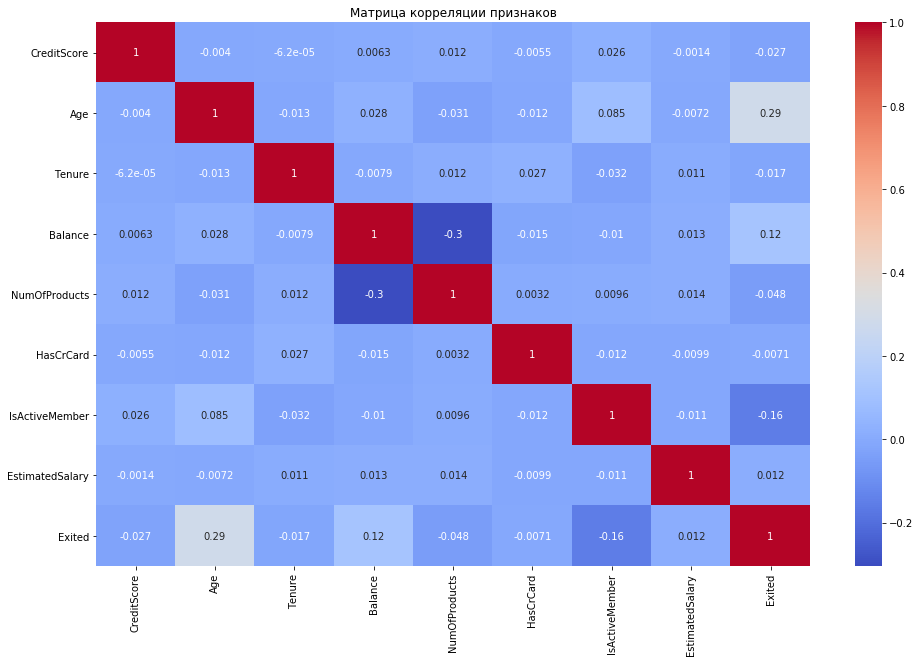

CPU times: user 525 ms, sys: 185 ms, total: 709 ms
Wall time: 789 ms


In [194]:
%%time

# Строим матрицу корреляции

plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), 
            annot = True, 
            cmap='coolwarm')
plt.title(f'Матрица корреляции признаков')
plt.show()

<Figure size 1152x720 with 0 Axes>

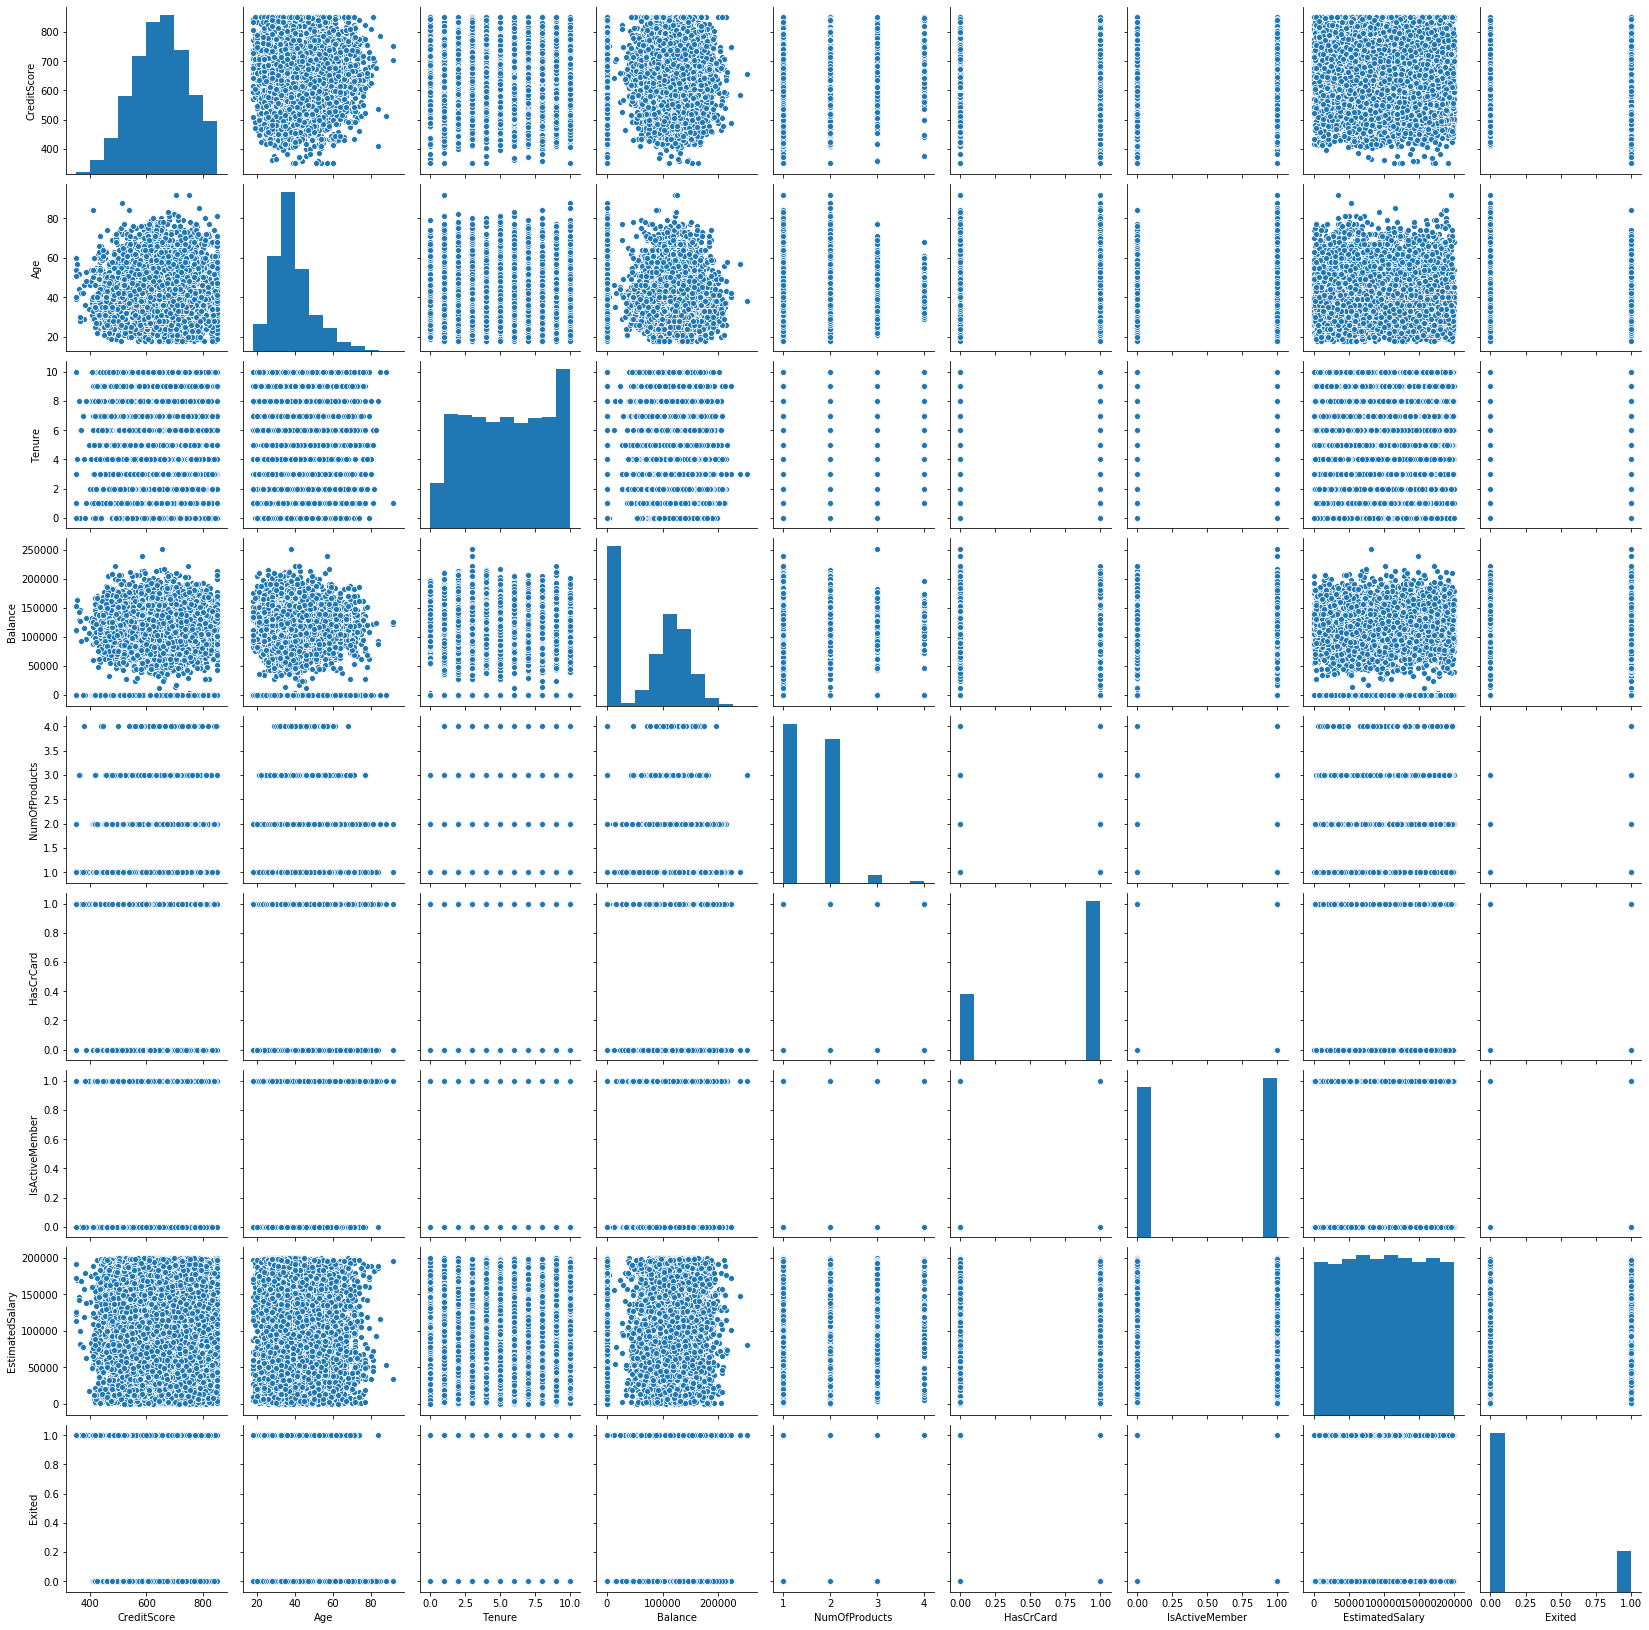

CPU times: user 18.8 s, sys: 197 ms, total: 19 s
Wall time: 19.1 s


In [195]:
%%time

# Строим графики корреляции

plt.figure(figsize=(16,10))
sns.pairplot(data)
plt.show()

Очевидной взаимосвязи отдельных признаков друг с другами не наблюдаем, поэтому выбранные признаки оставляем в полном составе. Отдельно посмотрим на распределение классов целевого признака:

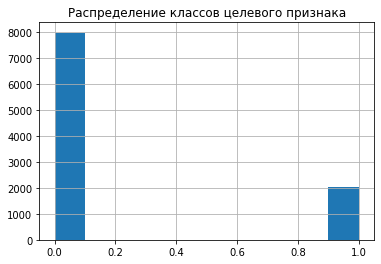

0    7963
1    2037
Name: Exited, dtype: int64


In [196]:
data.Exited.hist()
plt.title('Распределение классов целевого признака')
plt.show()
print(data.Exited.value_counts())

Наблюдаем явную расбалансировку классов. Оставшихся клиентов в банке примерно в 4 раза больше, чем ушедших. Будем учитывать это в дальнейшем при обучении моделей.

## Кодирование признаков

Применим кодирование категориальных признаков - страна и пол респондента.

In [209]:
# Так как в данном случае у категориальных переменных немного вариантов, 
# есть возможность применить метод get dummies

data_ohe = pd.get_dummies(data, drop_first=True)

# Проверим результат
data_ohe.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


## Разделение на выборки и масштабирование признаков

Разделим данные на обучающую, валидационную и тестовую выборки, затем масштабируем численные признаки с помощью метода scaler, обучив его на тренировочных данных.

In [212]:
# Теперь разделим данные на часть с искомым признаком и часть с признаками, 
# по которым будет осуществляться предсказание
x = data_ohe.drop(['Exited'], axis=1)
y = data_ohe['Exited']

In [213]:
# Сначала отделим 80% обучающей выборки
x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=12345, stratify=y)

In [215]:
# Теперь разделим оставшийся кусок на валидионную и тестовую сборки
x_valid, x_test, y_valid, y_test = train_test_split(x_valid, y_valid, test_size=0.5, random_state=12345)

In [216]:
# Импортируем скэйлер
from sklearn.preprocessing import StandardScaler

# Создаём список с количественными признаками, которые следует масштабировать
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance','NumOfProducts','EstimatedSalary']

# Обучаем скэйлер на обучающей выборке
scaler = StandardScaler()
scaler.fit(x_train[numeric])

# Применяем масштабирование к обучающей, валидационной и тестовой выборкам
x_train.loc[:, numeric] = scaler.transform(x_train[numeric])
x_valid.loc[:, numeric] = scaler.transform(x_valid[numeric])
x_test.loc[:, numeric] = scaler.transform(x_test[numeric])

/Users/peterefimov/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


## Обучение моделей без балансировки классов

В данном случае обучим модель логистической регрессии и случайного леса. Для определения оптимальных параметров применим gridsearch и оценим качество модели кривой ROC AUC и F1-мерой.

### Несбалансированный лес

In [218]:
%%time

# Задаём гиперпараметры
param_grid = {'max_depth': [depth for depth in range(5,11)],
             'n_estimators': [10,20,50,100]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid=param_grid)

# Обучаем гридсёрч
grid_search.fit(x_train, y_train)

CPU times: user 23.6 s, sys: 175 ms, total: 23.8 s
Wall time: 23.9 s


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [219]:
# Выведем полученные гиперпараметры
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 20}

In [220]:
%%time
# Применив полученные гиперпараметры, обучим лес без балансировки
forest_disbal = RandomForestClassifier(random_state=12345,
                                  max_depth=10,
                                    n_estimators=20)
forest_disbal.fit(x_train, y_train)
forest_disbal_predict = forest_disbal.predict(x_valid)

CPU times: user 138 ms, sys: 4.89 ms, total: 143 ms
Wall time: 144 ms


Оценим качество обученной модели

Значение метрики AUC ROC 0.8686082014779601
Значение F1-меры 0.6037735849056604


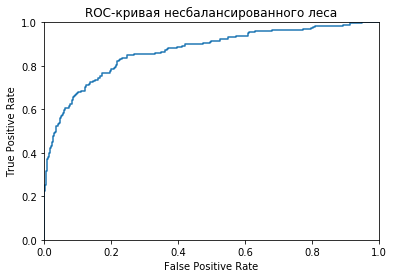

In [226]:
# Импортируем f1-меру, аук-рок кривую и соответствующую метрику
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

probabilities_valid = forest_disbal.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(y_valid, probabilities_one_valid)
f1 = f1_score(y_valid, forest_disbal_predict)

print(f'Значение метрики AUC ROC {auc_roc}')
print(f'Значение F1-меры {f1}')

fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая несбалансированного леса')
plt.show()

В результате обучения несбалансированного случайного леса получили довольно неплохие результаты по метрикам F1 и AUC ROC, кривая также свидетельствует о неплохом качестве модели. Продолжим обучение логистической регрессии.

### Несбалансированная регрессия

In [222]:
%%time
# В данном случае варьируем параметры пеналти и С
param_grid_LR = {'penalty':['l1','l2','elasticnet','none'],
                'C':[0.1,0.25,0.5,0.75,1.0]}

grid_search_LR = GridSearchCV(LogisticRegression(),param_grid = param_grid_LR)
grid_search_LR.fit(x_train, y_train)

/Users/peterefimov/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/Users/peterefimov/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/Users/peterefimov/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/Users/peterefimov/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_mode

CPU times: user 1.45 s, sys: 21 ms, total: 1.47 s
Wall time: 772 ms


/Users/peterefimov/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.25, 0.5, 0.75, 1.0],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [223]:
# Выводим полученные параметры
grid_search_LR.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [224]:
%%time

# Обучаем несбалансированную регрессию
lr_disbal = LogisticRegression(random_state=12345, C=0.1, penalty='l2')
lr_disbal.fit(x_train, y_train)
lr_disbal_predict = lr_disbal.predict(x_valid)

CPU times: user 30.9 ms, sys: 2.13 ms, total: 33 ms
Wall time: 20 ms


Значение метрики AUC ROC 0.7724080383839788
Значение F1-меры 0.31343283582089554


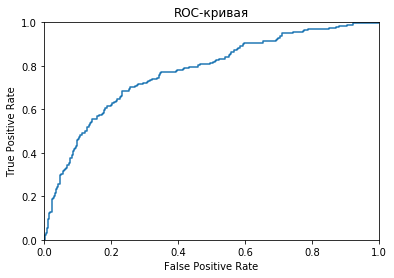

In [225]:
probabilities_valid = lr_disbal.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(y_valid, probabilities_one_valid)
f1 = f1_score(y_valid, lr_disbal_predict)

print(f'Значение метрики AUC ROC {auc_roc}')
print(f'Значение F1-меры {f1}')

fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая несбалансированной регрессии')
plt.show()

Логистическая регрессия получилась менее качественной, что особенно заметно по f1-мере. Далее будем рассматривать модель случайного леса.

 ## Балансировка классов
 
Проверим качество модели, обученной на выборках с балансировкой. Применим методы upsampling и downsampling, сравним результаты.

### Upsampling

In [227]:
# Определяем индексы строк, соответствующие разным классам целевого признака
ex_0_index = y_train[y_train == 0].index
ex_1_index = y_train[y_train != 0].index

# Определяем степень дисбаланса
# Присваиваем отдельные датафреймы с классом 0 и 1
ex_0 = data_ohe.loc[ex_0_index]
ex_1 = data_ohe.loc[ex_1_index]

# Далее определяем, на какую степень будем увеличивать обучающую выборку. 
# Экспериментальным путём установлено, что лучшее качество модели получается при увеличении выборки на четверть
coefficient = 0.25
difference = int(coefficient * (ex_0.shape[0] - ex_1.shape[0]))
print(f'Увеличиваем на {difference} строк')

Увеличиваем на 1185 строк


In [228]:
up_data = ex_1.sample(difference, replace=True).drop(['Exited'], axis=1)
up_y_data = y_train.loc[up_data.index]

# Объединяем нарощенные данные с обучающей выборкой
import numpy as np
x_train_upsampled = pd.concat([x_train, up_data])
y_train_upsampled = np.hstack((y_train.values, up_y_data.values))
x_train_upsampled.shape, y_train_upsampled.shape

((9185, 11), (9185,))

Размерности x и y соответствуют друг другу.

### Downsampling

In [229]:
down_data = ex_0.sample(ex_1.shape[0]).drop(['Exited'], axis=1)
down_y_data = y_train.loc[down_data.index]

x_train_downsampled = pd.concat([down_data, ex_1]).drop(['Exited'], axis=1)
y_train_downsampled = np.hstack((down_y_data.values, y_train[y_train != 0].values))
print(x_train_downsampled.shape, y_train_downsampled.shape)

(3260, 11) (3260,)


## Сбалансированный лес

Обучим модель случайного леса на увеличенной и уменьшенной обучающих выборках. Начнём с увеличенной.

### Сбалансированный лес, обученный на увеличенной выборке

In [240]:
%%time

# Обучим сбалансированный лес на увеличенной выборке. 
# Также укажем гиперпараметр class_weight
forest_up = RandomForestClassifier(random_state=12345,
                                  max_depth=10,
                                    n_estimators=20,
                                      class_weight='balanced')
forest_up.fit(x_train_upsampled, y_train_upsampled)
forest_up_predict = forest_up.predict(x_valid)

CPU times: user 159 ms, sys: 3.4 ms, total: 163 ms
Wall time: 164 ms


Значение метрики AUC ROC 0.8682225916771498
Значение F1-меры 0.6578947368421053


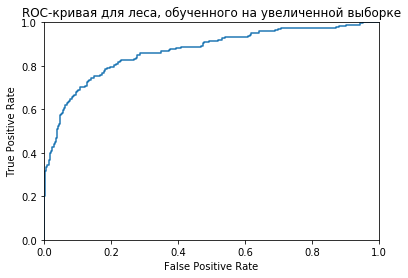

In [241]:
# Проверим качество обученной модели
probabilities_valid = forest_up.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(y_valid, probabilities_one_valid)
f1 = f1_score(y_valid, forest_up_predict)

print(f'Значение метрики AUC ROC {auc_roc}')
print(f'Значение F1-меры {f1}')

fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для леса, обученного на увеличенной выборке')
plt.show()

In [242]:
# Проверим полученную модель на тестовой выборке 
forest_up_predict_test = forest_up.predict(x_test)
f1 = f1_score(y_test, forest_up_predict_test)
print(f'Значение F1-меры леса, обученного на увеличенной выборке {f1}')

Значение F1-меры леса, обученного на увеличенной выборке 0.6005361930294907


Целевое значение f1-меры достигнуто. Далее обучим лес на уменьшенной выборке и посмотрим изменение метрики.

### Сбалансированный лес, обученный на уменьшенной выборке

In [243]:
%%time

# Обучим сбалансированный лес на уменьшенной выборке. 
# Также укажем гиперпараметр class_weight
forest_down = RandomForestClassifier(random_state=12345,
                                  max_depth=10,
                                    n_estimators=20,
                                      class_weight='balanced')
forest_down.fit(x_train_downsampled, y_train_downsampled)
forest_down_predict = forest_down.predict(x_valid)

CPU times: user 90.9 ms, sys: 3.33 ms, total: 94.3 ms
Wall time: 95.4 ms


Значение метрики AUC ROC 0.642795734270597
Значение F1-меры 0.4295942720763723


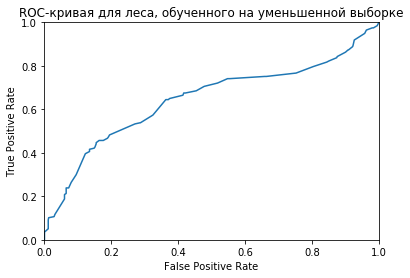

In [244]:
# Проверим качество обученной модели

probabilities_valid = forest_down.predict_proba(x_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(y_valid, probabilities_one_valid)
f1 = f1_score(y_valid, forest_down_predict)

print(f'Значение метрики AUC ROC {auc_roc}')
print(f'Значение F1-меры {f1}')

fpr, tpr, thresholds = roc_curve(y_valid, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для леса, обученного на уменьшенной выборке')
plt.show()

In [245]:
# Оценим качество на тестовой выборке
forest_down_predict_test = forest_down.predict(x_test)
f1 = f1_score(y_test, forest_down_predict_test)
print(f'Значение F1-меры леса, обученного на увеличенной выборке {f1}')

Значение F1-меры леса, обученного на увеличенной выборке 0.40294840294840295


Видим, что модель, обученная на увеличенной выборке, обладает более высоким качеством.

## Конечная модель

Переприсвоим полученную модель и выведем метрики

Значение метрики AUC ROC 0.861778179626281
Значение F1-меры 0.6005361930294907


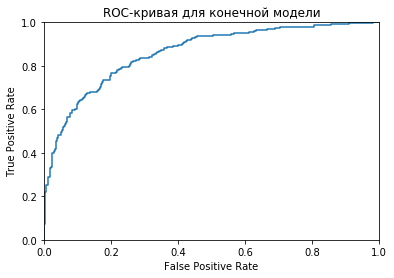

In [248]:
# Проверим качество обученной модели

model_final = forest_up

probabilities_valid = model_final.predict_proba(x_test)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(y_test, probabilities_one_valid)

model_final_predict = model_final.predict(x_test)
f1 = f1_score(y_test, model_final_predict)

print(f'Значение метрики AUC ROC {auc_roc}')
print(f'Значение F1-меры {f1}')

fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid)

plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая для конечной модели')
plt.show()

Полученная модель удовлетворяет требованиям технического задания.

## Вывод

В рамках данного проекта выполнены следующие этапы:
1. Загружены и изученны данные, обработан пропуск в признаке tenure.
2. Данные разделены на обучающую, валидационную и тестовую выборки.
3. Категориальные данные кодированы в численные значения, количественные данные масштабированы.
4. Определён дисбаланс классов.
5. Обучены модели логистической регрессии и случайного леса без балансировки классов. Выявлено, что случайный лес обладает более высоким качеством в данном случае.
6. Проведена балансировка классов путём увеличения выборки с меньшим классом и уменьшением выборки с большим классом.
7. Модель случайного леса обучена на двух вариантах выборок. Модель на увеличенной выборке обладает лучшим результатом, удовлетворяет заданному значению f1-меры, её можно считать конечной. 
8. Модель на уменьшенной выборке обладает более низким качеством. Можно предположить, что модель недообучается, т.к. данных в этом случае недостаточно.